In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist # Load the MNIST dataset 28x28 images of handwritten digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to the range [0, 1]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


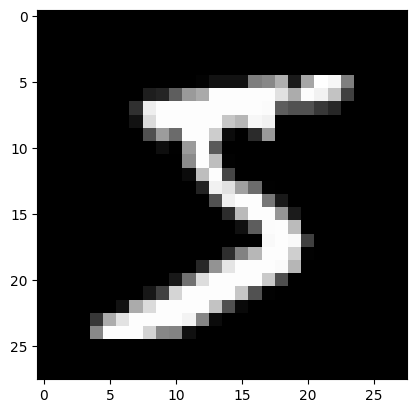

In [6]:
import matplotlib.pyplot as plt
# print(x_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.show()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# Reshape the data to add a channel dimension

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # Flatten the 28x28 images into a 784-dimensional vector
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Add a fully connected layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Add another fully connected layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Add the output layer with 10 neurons (one for each digit) and softmax activation


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.fit(x_train, y_train, epochs=3) # Train the model for 3 epochs

C:\Users\itsja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8708 - loss: 0.4615
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9662 - loss: 0.1111
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9776 - loss: 0.0706


In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test) # Evaluate the model on the test set
print(val_loss, val_acc) # Print the validation loss and accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1078
0.0946464017033577 0.9707000255584717


In [11]:
model.save('epic_nim_reader.model.keras') # Save the trained model to a file

In [13]:
import numpy as np
predictions = model.predict(x_test) # Make predictions on the test set
print(np.argmax(predictions[0])) # Print the predicted class for the first test image

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7


In [14]:
import numpy as np
import pandas as pd

# Flatten the input data
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten 28x28 images into 784-dimensional vectors
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Initialize weights and biases
input_size = 784  # Number of input features
hidden_size = 128  # Number of neurons in the hidden layer
output_size = 10  # Number of output classes

np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_output = np.zeros((1, output_size))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# One-hot encode the labels
y_train_one_hot = np.eye(output_size)[y_train]
y_test_one_hot = np.eye(output_size)[y_test]

# Training parameters
learning_rate = 0.01
epochs = 5

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(x_train_flat, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predictions = softmax(output_layer_input)

    # Compute loss (categorical cross-entropy)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(predictions + 1e-8), axis=1))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    # Backward pass
    output_error = predictions - y_train_one_hot
    hidden_error = np.dot(output_error, weights_hidden_output.T) * relu_derivative(hidden_layer_input)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error) / x_train_flat.shape[0]
    bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True) / x_train_flat.shape[0]
    weights_input_hidden -= learning_rate * np.dot(x_train_flat.T, hidden_error) / x_train_flat.shape[0]
    bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True) / x_train_flat.shape[0]

# Evaluate the model
hidden_layer_input = np.dot(x_test_flat, weights_input_hidden) + bias_hidden
hidden_layer_output = relu(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predictions = softmax(output_layer_input)

accuracy = np.mean(np.argmax(predictions, axis=1) == y_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/5, Loss: 2.3027218473560525
Epoch 2/5, Loss: 2.3027011844659904
Epoch 3/5, Loss: 2.3026805288757477
Epoch 4/5, Loss: 2.3026598801938287
Epoch 5/5, Loss: 2.302639238606818
Test Accuracy: 0.1242


In [15]:
# Predict the class probabilities for the first 5 test samples
predicted_classes = model.predict(x_test[:5])
# Print the predicted classes
print("Predicted classes:", [np.argmax(pred) for pred in predicted_classes])
# Print the actual classes
print("Actual classes:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted classes: [np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]
Actual classes: [7 2 1 0 4]
